<a href="https://colab.research.google.com/github/miguelvelascop/PFG_Miguel_Velasco_Puig/blob/main/Entrenamiento_Modelos_PGF_Depresjon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

Cargamos el dataset, depresión y no depresión por separado, que previamente he mergeado, ya que estaban separados por pacientes

In [ ]:
from google.colab import files
depresjon_data = files.upload()



Saving Dataset_Depresjon_procesado.csv to Dataset_Depresjon_procesado.csv


In [ ]:
data=pd.read_csv("Dataset_Depresjon_procesado.csv",  sep=',',  comment='#')

Pasamos los csv a matrices, quitando los índices


In [ ]:
depresjon_origin = pd.read_csv("Dataset_Depresjon_procesado.csv",  sep=',',  comment='#').to_numpy()

Separar las etiquetas de los datos de entrenamiento

In [ ]:
depresjon_data = depresjon_origin[:, :-1]
depresjon_target = depresjon_origin[:, -1]

Oversampling SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=50)
depresjon_data_resampled, depresjon_target_resampled = smote.fit_resample(depresjon_data, depresjon_target)
print(depresjon_data_resampled.size)

8040


Normalización

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(depresjon_data_resampled)
depresjon_data_resampled_rescaled = scaler.transform(depresjon_data_resampled)

Selección de caráccterísticas (no se utiliza posteriormente)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=6)

print(depresjon_data_resampled_rescaled.shape)
test_seleccion_caracteristicas = selector.fit_transform(depresjon_data_resampled_rescaled, depresjon_target_resampled)
print(selector.get_support(indices=True))
print(selector.scores_)
print(test_seleccion_caracteristicas.shape)

Separación de los datos en 20/80 para tener un conjunto de entrenamiento y una de prueba

In [ ]:
from sklearn.model_selection import train_test_split
train_depresjon_x, test_depresjon_x, train_depresjon_y, test_depresjon_y = train_test_split(depresjon_data_resampled_rescaled, depresjon_target_resampled, test_size=0.2, random_state=42)

Primero importo los modelos que usaremos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier as GPC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neural_network import MLPClassifier as MLP

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV

In [ ]:
selector = SelectKBest(chi2, k=6)

print(train_depresjon_x.shape)
demonicSalmon_data = selector.fit_transform(demonicSalmon_data, demonicSalmon_target)
print(selector.get_support(indices=True))
print(selector.scores_)
print(demonicSalmon_data.shape)

Selección de parámetros KNN (el entrenamiento, la predicción y la obtención de métricas se realiza 10 veces)

In [ ]:
parametros = {'n_neighbors':[1, 10]}
knn = KNN()
knn = GridSearchCV(knn, parametros)
accuracyKNN = []
precisionKNN = []
recallKNN = []
f1KNN = []
for i in range(10):
  knn.fit(train_depresjon_x, train_depresjon_y)
  resultKNN = knn.predict(test_depresjon_x)
  accuracyKNN.append(accuracy_score(resultKNN, test_depresjon_y))
  precisionKNN.append(precision_score(resultKNN, test_depresjon_y))
  recallKNN.append(recall_score(resultKNN, test_depresjon_y))
  f1KNN.append(f1_score(resultKNN, test_depresjon_y))

Entrenamiento KNN

In [ ]:
resultKNN = knn.fit(train_depresjon_x, train_depresjon_y)


Validación KNN

In [ ]:
scoresKNN = cross_val_score(resultKNN, train_depresjon_x, train_depresjon_y, cv=10)
print(scoresKNN)

[0.74074074 0.80555556 0.78504673 0.6635514  0.82242991 0.71962617
 0.71962617 0.76635514 0.71028037 0.76635514]


Matriz de confusión

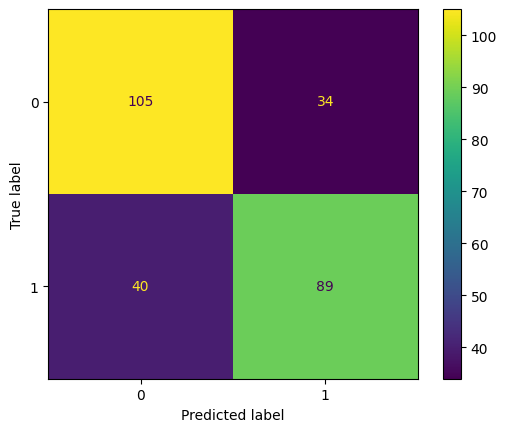

In [ ]:
y_pred = knn.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de KNN

In [ ]:
meanAcKNN = np.median(accuracyKNN)
stdAcKNN=np.std(accuracyKNN)
meanPrKNN = np.median(precisionKNN)
stdPrKNN=np.std(precisionKNN)
meanReKNN = np.median(recallKNN)
stdReKNN=np.std(recallKNN)
meanF1KNN = np.median(f1KNN)
stdF1KNN=np.std(f1KNN)
print(meanAcKNN, stdAcKNN,meanPrKNN, stdPrKNN,meanReKNN, stdReKNN,meanF1KNN, stdF1KNN)

0.7164179104477612 1.1102230246251565e-16 0.6589147286821705 1.1102230246251565e-16 0.7264957264957265 0.0 0.6910569105691057 1.1102230246251565e-16


Selección de parámetros SVC

In [ ]:
parametros = {'kernel': ('linear', 'rbf'),'C': [1, 10, 100]}
svm = SVC()
accuracySVC = []
precisionSVC = []
recallSVC = []
f1SVC = []
svm = GridSearchCV(svm, parametros)
for i in range(10):
  svm.fit(train_depresjon_x, train_depresjon_y)
  resultSVC = svm.predict(test_depresjon_x)
  accuracySVC.append(accuracy_score(resultSVC, test_depresjon_y))
  precisionSVC.append(precision_score(resultSVC, test_depresjon_y))
  recallSVC.append(recall_score(resultSVC, test_depresjon_y))
  f1SVC.append(f1_score(resultSVC, test_depresjon_y))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Entrenamiento SVM

In [ ]:
resultSVM = svm.fit(train_depresjon_x, train_depresjon_y)

Validación SVM

In [ ]:
scoresSVM = cross_val_score(resultSVM, train_depresjon_x, train_depresjon_y, cv=10)
print(scoresSVM)

[0.75       0.77777778 0.85046729 0.70093458 0.77570093 0.76635514
 0.77570093 0.82242991 0.73831776 0.78504673]


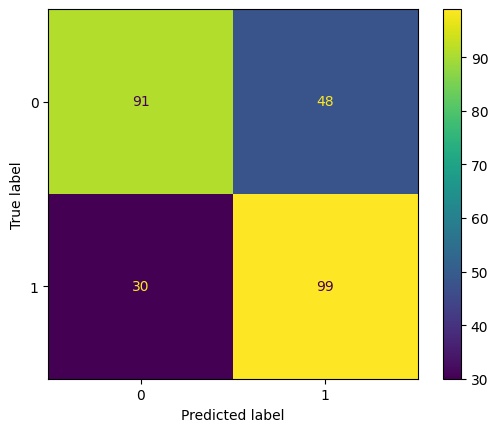

In [ ]:
y_pred = svm.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de SVM

In [ ]:
meanAcSVC = np.median(accuracySVC)
stdAcSVC=np.std(accuracySVC)
meanPrSVC = np.median(precisionSVC)
stdPrSVC=np.std(precisionSVC)
meanReSVC = np.median(recallSVC)
stdReSVC=np.std(recallSVC)
meanF1SVC = np.median(f1SVC)
stdF1SVC=np.std(f1SVC)
print(meanAcSVC, stdAcSVC)

0.7089552238805971 0.0


Selección de parámetros linearSVM

In [ ]:
parametros = {'C': [1, 10], 'penalty':('l1','l2'),'loss':('hinge','square_hinge'),'intercept_scaling':[1, 10]}
linearSVM = LinearSVC()
accuracyLinearSVM = []
precisionLinearSVM = []
recallLinearSVM = []
f1LinearSVM = []
linearSVM = GridSearchCV(linearSVM, parametros)
for i in range(10):
  linearSVM.fit(train_depresjon_x, train_depresjon_y)
  resultLinearSVM = linearSVM.predict(test_depresjon_x)
  accuracyLinearSVM.append(accuracy_score(resultLinearSVM, test_depresjon_y))
  precisionLinearSVM.append(precision_score(resultLinearSVM, test_depresjon_y))
  recallLinearSVM.append(recall_score(resultLinearSVM, test_depresjon_y))
  f1LinearSVM.append(f1_score(resultLinearSVM, test_depresjon_y))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Entrenamiento LinearSVM

In [ ]:
modelSVM = linearSVM.fit(train_depresjon_x, train_depresjon_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Validación LinearSVC

In [ ]:
scoresLinearSVM = cross_val_score(modelSVM, train_depresjon_x, train_depresjon_y, cv=10)
print(scoresLinearSVM)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

[0.58333333 0.68518519 0.69158879 0.61682243 0.65420561 0.60747664
 0.57009346 0.62616822 0.64485981 0.63551402]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


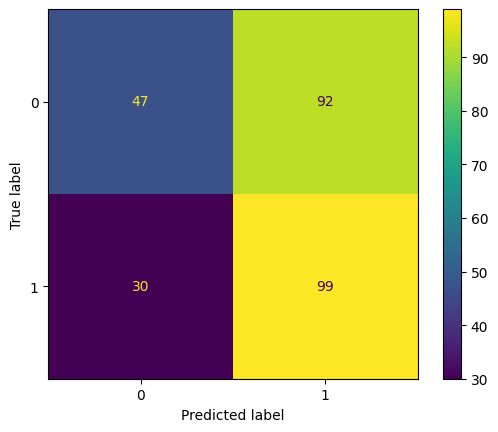

In [ ]:
y_pred = linearSVM.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de LinearSVC

In [ ]:
meanAcLinearSVM = np.median(accuracyLinearSVM)
stdAcLinearSVM=np.std(accuracyLinearSVM)
meanPrLinearSVM = np.median(precisionLinearSVM)
stdPrLinearSVM=np.std(precisionLinearSVM)
meanReLinearSVM = np.median(recallLinearSVM)
stdReLinearSVM=np.std(recallLinearSVM)
meanF1LinearSVM = np.median(f1LinearSVM)
stdF1LinearSVM=np.std(f1LinearSVM)
print(meanAcLinearSVM, stdAcLinearSVM)

0.541044776119403 0.03453055313808739


Selección de parámetros GPC

In [ ]:
parametros = {'optimizer':('fmin_l_bfgs_b','callable','None')}
gpc = GPC()
accuracyGPC = []
precisionGPC = []
recallGPC = []
f1GPC = []
gpc = GridSearchCV(gpc, parametros)
for i in range(10):
  gpc.fit(train_depresjon_x, train_depresjon_y)
  resultGPC = gpc.predict(test_depresjon_x)
  accuracyGPC.append(accuracy_score(resultGPC, test_depresjon_y))
  precisionGPC.append(precision_score(resultGPC, test_depresjon_y))
  recallGPC.append(recall_score(resultGPC, test_depresjon_y))
  f1GPC.append(f1_score(resultGPC, test_depresjon_y))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Entrenamiento GPC

In [ ]:
modelGPC = gpc.fit(train_depresjon_x, train_depresjon_y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Validación GPC

In [ ]:
scoresGPC = cross_val_score(modelGPC, train_depresjon_x, train_depresjon_y, cv=10)
print(scoresGPC)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

[0.69444444 0.80555556 0.75700935 0.64485981 0.76635514 0.72897196
 0.71962617 0.75700935 0.71962617 0.78504673]


Matriz de Confusión

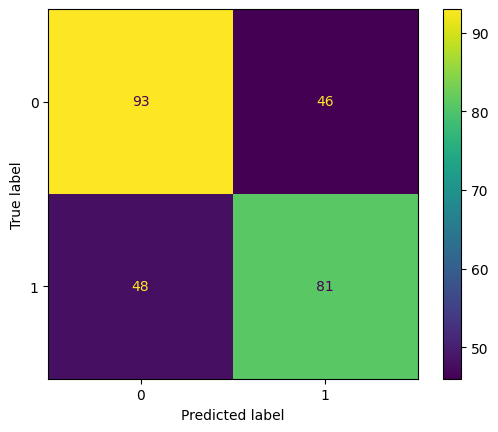

In [ ]:
y_pred = gpc.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de GPC

In [ ]:
meanAcGPC = np.median(accuracyGPC)
stdAcGPC=np.std(accuracyGPC)
meanPrGPC = np.median(precisionGPC)
stdPrGPC=np.std(precisionGPC)
meanReGPC = np.median(recallGPC)
stdReGPC=np.std(recallGPC)
meanF1GPC = np.median(f1GPC)
stdF1GPC=np.std(f1GPC)
print(meanAcGPC, stdAcGPC)

0.6492537313432836 0.0


Selección de parámetros DTC

In [ ]:
parametros = {'min_samples_split':[1,100],'splitter':('best','random'),'max_features':('auto','sqrt')}
accuracyDTC = []
precisionDTC = []
recallDTC = []
f1DTC = []
dtc = DTC()
dtc = GridSearchCV(dtc, parametros)
for i in range(10):
  dtc.fit(train_depresjon_x, train_depresjon_y)
  resultDTC = dtc.predict(test_depresjon_x)
  accuracyDTC.append(accuracy_score(resultDTC, test_depresjon_y))
  precisionDTC.append(precision_score(resultDTC, test_depresjon_y))
  recallDTC.append(recall_score(resultDTC, test_depresjon_y))
  f1DTC.append(f1_score(resultDTC, test_depresjon_y))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Entrenamiento DTC

In [ ]:
resultDTC = dtc.fit(train_depresjon_x, train_depresjon_y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Validación DTC

In [ ]:
scoresDTC = cross_val_score(resultDTC, train_depresjon_x, train_depresjon_y, cv=10)
print(scoresDTC)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

[0.74074074 0.69444444 0.8317757  0.62616822 0.76635514 0.74766355
 0.73831776 0.76635514 0.72897196 0.68224299]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Matriz de Confusión

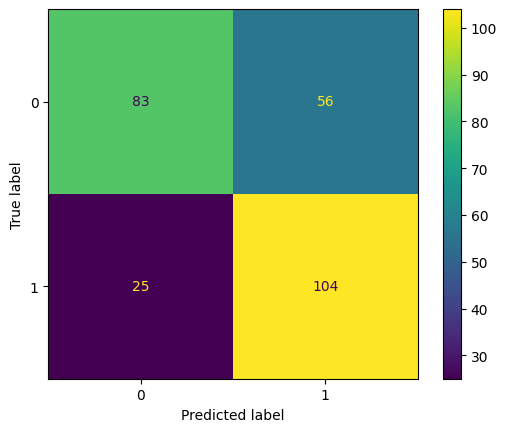

In [ ]:
y_pred = dtc.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de DTC

In [ ]:
meanAcDTC = np.median(accuracyDTC)
stdAcDTC=np.std(accuracyDTC)
meanPrDTC = np.median(precisionDTC)
stdPrDTC=np.std(precisionDTC)
meanReDTC = np.median(recallDTC)
stdReDTC=np.std(recallDTC)
meanF1DTC = np.median(f1DTC)
stdF1DTC=np.std(f1DTC)
print(meanAcDTC, stdAcDTC)

0.6940298507462687 0.021999108914901006


Seleccionar caracteríticas RFC

In [ ]:
parametros = {'criterion':('gini','entropy','log_loss'),'bootstrap':[True, False]}
accuracyRFC = []
precisionRFC = []
recallRFC = []
f1RFC = []
rfc = RFC()
rfc = GridSearchCV(rfc, parametros)
for i in range(10):
  rfc.fit(train_depresjon_x, train_depresjon_y)
  resultRFC = rfc.predict(test_depresjon_x)
  accuracyRFC.append(accuracy_score(resultRFC, test_depresjon_y))
  precisionRFC.append(precision_score(resultRFC, test_depresjon_y))
  recallRFC.append(recall_score(resultRFC, test_depresjon_y))
  f1RFC.append(f1_score(resultRFC, test_depresjon_y))

Entrenamiento RFC

In [ ]:
resultRFC = rfc.fit(train_depresjon_x, train_depresjon_y)

Validación RFC

In [ ]:
scoresRFC = cross_val_score(resultRFC, test_depresjon_x, test_depresjon_y, cv=10)
print(scoresRFC)

[0.66666667 0.66666667 0.7037037  0.66666667 0.88888889 0.74074074
 0.51851852 0.7037037  0.53846154 0.76923077]


Matriz de Confusión

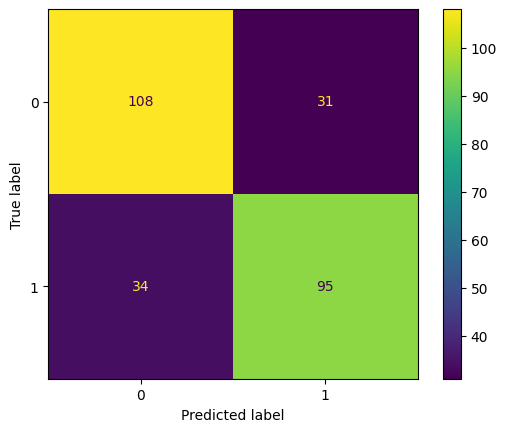

In [ ]:
y_pred = rfc.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de RFC

In [ ]:
meanAcRFC = np.median(accuracyRFC)
stdAcRFC=np.std(accuracyRFC)
meanPrRFC = np.median(precisionRFC)
stdPrRFC=np.std(precisionRFC)
meanReRFC = np.median(recallRFC)
stdReRFC=np.std(recallRFC)
meanF1RFC = np.median(f1RFC)
stdF1RFC=np.std(f1RFC)
print(meanAcRFC, stdAcRFC)

0.7555970149253731 0.006254871124716504


Selección de características AdaBoost

In [ ]:
parametros = {'n_estimators':[20, 100],'algorithm':('SAMME', 'SAMME.R'),'learning_rate':[1, 10]}
accuracyABC = []
precisionABC = []
recallABC = []
f1ABC = []
abc = ABC()
abc = GridSearchCV(abc, parametros)
for i in range(10):
  abc.fit(train_depresjon_x, train_depresjon_y)
  resultABC = abc.predict(test_depresjon_x)
  accuracyABC.append(accuracy_score(resultABC, test_depresjon_y))
  precisionABC.append(precision_score(resultABC, test_depresjon_y))
  recallABC.append(recall_score(resultABC, test_depresjon_y))
  f1ABC.append(f1_score(resultABC, test_depresjon_y))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Entrenamiento AdaBoost

In [ ]:
resultABC = abc.fit(train_depresjon_x, train_depresjon_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Validación ABC

In [ ]:
scoresABC = cross_val_score(resultABC, test_depresjon_x, test_depresjon_y, cv=10)
print(scoresABC)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[0.77777778 0.7037037  0.81481481 0.77777778 0.77777778 0.81481481
 0.66666667 0.66666667 0.73076923 0.57692308]


Matriz de Confusión

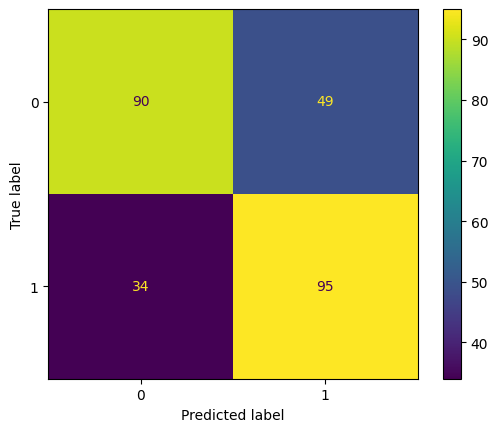

In [ ]:
y_pred = abc.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de ABC

In [ ]:
meanAcABC = np.median(accuracyABC)
stdAcABC=np.std(accuracyABC)
meanPrABC = np.median(precisionABC)
stdPrABC=np.std(precisionABC)
meanReABC = np.median(recallABC)
stdReABC=np.std(recallABC)
meanF1ABC = np.median(f1ABC)
stdF1ABC=np.std(f1ABC)
print(meanAcABC, stdAcABC)

0.6902985074626866 0.0


In [ ]:
nb = NB()
accuracyNB = []
precisionNB = []
recallNB = []
f1NB = []
for i in range(10):
  nb.fit(train_depresjon_x, train_depresjon_y)
  resultNB = nb.predict(test_depresjon_x)
  accuracyNB.append(accuracy_score(resultNB, test_depresjon_y))
  precisionNB.append(precision_score(resultNB, test_depresjon_y))
  recallNB.append(recall_score(resultNB, test_depresjon_y))
  f1NB.append(f1_score(resultNB, test_depresjon_y))

Entrenamiento GaussianNN

In [ ]:
resultNB = nb.fit(train_depresjon_x, train_depresjon_y)

Validación NB

In [ ]:
scoresNB = cross_val_score(resultNB, test_depresjon_x, test_depresjon_y, cv=10)
print(scoresNB)

[0.55555556 0.66666667 0.62962963 0.74074074 0.77777778 0.81481481
 0.66666667 0.62962963 0.88461538 0.53846154]


Matriz de confusión

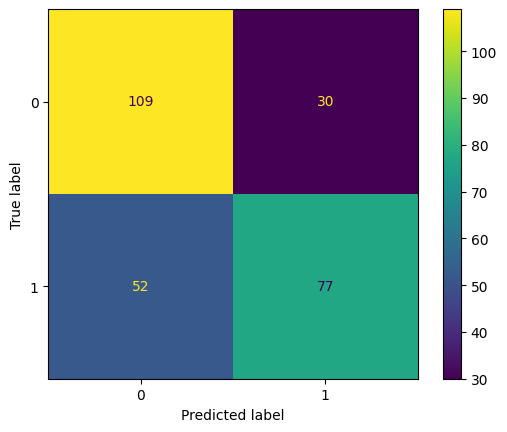

In [ ]:
y_pred = nb.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de NB

In [ ]:
meanAcNB = np.median(accuracyNB)
stdAcNB=np.std(accuracyNB)
meanPrNB = np.median(precisionNB)
stdPrNB=np.std(precisionNB)
meanReNB = np.median(recallNB)
stdReNB=np.std(recallNB)
meanF1NB = np.median(f1NB)
stdF1NB=np.std(f1NB)
print(meanAcNB, stdAcNB)

0.6940298507462687 0.0


Entrenamiento Red Neuronal (MLP)

In [ ]:
mlp = MLP(hidden_layer_sizes=(150,100,50),max_iter=300,activation='relu',solver='adam')
accuracyMLP = []
precisionMLP = []
recallMLP = []
f1MLP = []
for i in range(10):
  mlp.fit(train_depresjon_x, train_depresjon_y)
  resultMLP = mlp.predict(test_depresjon_x)
  accuracyMLP.append(accuracy_score(resultMLP, test_depresjon_y))
  precisionMLP.append(precision_score(resultMLP, test_depresjon_y))
  recallMLP.append(recall_score(resultMLP, test_depresjon_y))
  f1MLP.append(f1_score(resultMLP, test_depresjon_y))

Entrenamiento MLP

In [ ]:
resultMLP = mlp.fit(train_depresjon_x, train_depresjon_y)

Validación MLP

In [ ]:
scoresMLP = cross_val_score(resultMLP, test_depresjon_x, test_depresjon_y, cv=10)
print(scoresMLP)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.74074074 0.62962963 0.7037037  0.77777778 0.85185185 0.7037037
 0.66666667 0.59259259 0.84615385 0.61538462]


Matriz de confusión MLP

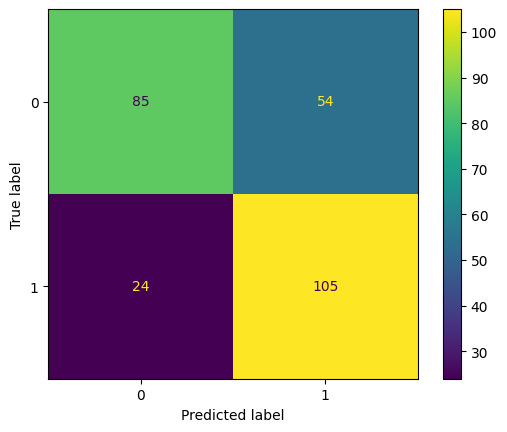

In [ ]:
y_pred = mlp.predict(test_depresjon_x)
cm = confusion_matrix(test_depresjon_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Média y varianza de MLP

In [ ]:
meanMLP=np.median(accuracyMLP)
stdMLP=np.std(accuracyMLP)
meanAcMLP = np.median(accuracyMLP)
stdAcMLP=np.std(accuracyMLP)
meanPrMLP = np.median(precisionMLP)
stdPrMLP=np.std(precisionMLP)
meanReMLP = np.median(recallMLP)
stdReMLP=np.std(recallMLP)
meanF1MLP = np.median(f1MLP)
stdF1MLP=np.std(f1MLP)
print(meanAcMLP, stdAcMLP)

0.7052238805970149 0.010820895522388055


Comparación final

In [ ]:
print("Resultados KNN/ Accuracy: ",meanAcKNN, stdAcKNN, " Precision", meanPrKNN, stdPrKNN, " Recall:", meanReKNN, stdReKNN, " F1:",meanF1KNN, stdF1KNN)
print("Resultados SVM/ Accuracy: ",meanAcSVC, stdAcSVC," Precision",meanPrSVC, stdPrSVC," Recall:",meanReSVC, stdReSVC," F1:",meanF1SVC, stdF1SVC)
print("Resultados LSVM/ Accuracy: ",meanAcLinearSVM, stdAcLinearSVM," Precision",meanPrLinearSVM, stdPrLinearSVM," Recall:",meanReLinearSVM, stdReLinearSVM," F1:",meanF1LinearSVM, stdF1LinearSVM)
print("Resultados GPC/ Accuracy: ",meanAcGPC, stdAcGPC," Precision",meanPrGPC, stdPrGPC," Recall:",meanReGPC, stdReGPC," F1:",meanF1GPC, stdF1GPC)
print("Resultados DTC/ Accuracy: ",meanAcDTC, stdAcDTC," Precision",meanPrDTC, stdPrDTC," Recall:",meanReDTC, stdReDTC," F1:",meanF1DTC, stdF1DTC)
print("Resultados RFC/ Accuracy: ",meanAcRFC, stdAcRFC," Precision",meanPrRFC, stdPrRFC," Recall:",meanReRFC, stdReRFC," F1:",meanF1RFC, stdF1RFC)
print("Resultados AdaBoost/ Accuracy: :",meanAcABC, stdAcABC," Precision",meanPrABC, stdPrABC," Recall:",meanReABC, stdReABC," F1:",meanF1ABC, stdF1ABC)
print("Resultados GaussianNB/ Accuracy: ",meanAcNB, stdAcNB," Precision",meanPrNB, stdPrNB," Recall:",meanReNB, stdReNB," F1:",meanF1NB, stdF1NB)
print("Resultados MLP/ Accuracy: ",meanAcMLP, stdAcMLP," Precision",meanPrMLP, stdPrMLP," Recall:",meanReMLP, stdReMLP," F1:",meanF1MLP, stdF1MLP)

Resultados KNN/ Accuracy:  0.7164179104477612 1.1102230246251565e-16  Precision 0.6589147286821705 1.1102230246251565e-16  Recall: 0.7264957264957265 0.0  F1: 0.6910569105691057 1.1102230246251565e-16
Resultados SVM/ Accuracy:  0.7089552238805971 0.0  Precision 0.7674418604651163 1.1102230246251565e-16  Recall: 0.673469387755102 1.1102230246251565e-16  F1: 0.717391304347826 0.0
Resultados LSVM/ Accuracy:  0.541044776119403 0.03453055313808739  Precision 0.5116279069767442 0.14733577317912228  Recall: 0.5184235910155712 0.07576252721334265  F1: 0.5028301886792452 0.05808034823332976
Resultados GPC/ Accuracy:  0.6492537313432836 0.0  Precision 0.627906976744186 0.0  Recall: 0.6377952755905512 0.0  F1: 0.6328125 0.0
Resultados DTC/ Accuracy:  0.6940298507462687 0.021999108914901006  Precision 0.7403100775193798 0.06559440558544549  Recall: 0.6644046742730954 0.023526770448607414  F1: 0.6974128540305011 0.03186674010287634
Resultados RFC/ Accuracy:  0.7555970149253731 0.006254871124716504 